# Visualization and Preprocessing notebook

This notebook shows examples for the functions of the BoxSERS package related to the visualization and preprocessing of spectra. 


In [1]:
import numpy as np
import pandas as pd

from boxsers.preprocessing import savgol_smoothing, als_baseline_cor, intensity_normalization
from boxsers.visual_tools import spectro_plot, random_plot, distribution_plot

## Database importation

---

In [2]:
df = pd.read_hdf('Bile_acids_27_07_2020.h5', key='df')  # Load bile acids dataframe
wn = np.load('Raman_shift_27_07_2020.npy')  # Load Wavenumber (Raman shift)
display(df)  # Prints a detailed overview of the imported dataframe "df"

# Features extraction: Exports dataframe spectra as a numpy array (value type = float64).
sp = df.iloc[:, 1:].to_numpy()
# Labels extraction: Export dataframe classes into a numpy array of string values.
label = df.loc[:, 'Classes'].values

,Classes,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,Blank,14698.0,14600.0,14933.0,15008.0,14864.0,14869.0,14982.0,14968.0,15026.0,...,5813.0,5717.0,5795.0,5865.0,5648.0,5667.0,5656.0,5764.0,5741.0,5807.0
1,Blank,14622.0,14329.0,14766.0,15041.0,14927.0,14907.0,14783.0,15076.0,15234.0,...,5778.0,5897.0,5735.0,5778.0,5695.0,5734.0,5627.0,5845.0,5666.0,5805.0
2,Blank,15225.0,15343.0,15557.0,15533.0,15518.0,15601.0,15366.0,15541.0,15645.0,...,5617.0,5574.0,5801.0,5672.0,5629.0,5648.0,5608.0,5690.0,5744.0,5726.0
3,Blank,15052.0,14922.0,15215.0,15310.0,15437.0,15208.0,15166.0,15625.0,15499.0,...,5740.0,5808.0,5958.0,5881.0,5828.0,5757.0,5877.0,5826.0,5822.0,5785.0
4,Blank,14211.0,14370.0,14346.0,14550.0,14601.0,14521.0,14431.0,14757.0,14741.0,...,5558.0,5607.0,5706.0,5747.0,5604.0,5546.0,5563.0,5682.0,5558.0,5543.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,TCDCA,13532.0,13549.0,13639.0,13916.0,13721.0,13758.0,13736.0,13828.0,13827.0,...,5694.0,5746.0,5649.0,5562.0,5608.0,5601.0,5603.0,5616.0,5528.0,5611.0
4796,TCDCA,13277.0,13086.0,13472.0,13415.0,13415.0,13459.0,13657.0,13387.0,13615.0,...,5743.0,5801.0,5769.0,5669.0,5639.0,5709.0,5718.0,5743.0,5768.0,5616.0
4797,TCDCA,14002.0,13930.0,13961.0,14149.0,14165.0,14155.0,14292.0,14107.0,14119.0,...,5679.0,5670.0,5718.0,5721.0,5578.0,5639.0,5596.0,5614.0,5637.0,5614.0
4798,TCDCA,14140.0,14022.0,14204.0,14271.0,14285.0,14313.0,14375.0,14258.0,14522.0,...,5936.0,6091.0,5975.0,6084.0,5859.0,5919.0,5950.0,5957.0,5997.0,5910.0


## Spectrum visualization 

---

**Important functions used :** 

   - ``random_plot`` : Plot a number of randomly selected spectra from a set of spectra
   - ``spectro_plot`` : Returns a plot with the selected spectrum(s)


**Comments :**

- Write ``help(name of the function or the class)`` to get more information, namely on the parameters. 


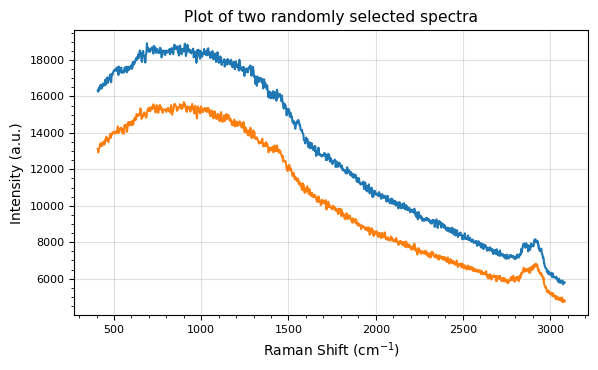

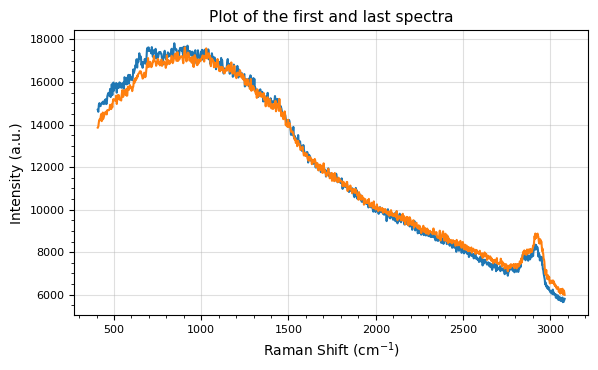

In [3]:
# Plotting five randomly selected spectra in the spectra array.
random_plot(wn, sp, random_spectra=2, title='Plot of two randomly selected spectra')

# Plotting of the first (0) and last (-1) spectra in the spectra array. 
spectro_plot(wn, sp[0], sp[-1], title='Plot of the first and last spectra')

## Preprocessing of spectra

---

**Important functions used :**

1. `als_baseline_cor` (BC): Subtracts the baseline signal from the spectrum(s) using Asymmetric Least Squares estimation.
2. `savgol_smoothing` (Svg) : Smoothes the spectrum(s) using a Savitzky-Golay polynomial filter.
3. `intensity_normalization` (Norm) : Normalizes the spectrum(s) using one of the three available norms ( L2, L1, maxmin)  


**Comments** :

- The spectrum preprocessing sequence used here is arbitrary. 

- Some functions are not presented, but remain accessible from the _preprocessing.py_ module :
    - ``cosmic_filter`` : Applies a median filter to remove cosmic rays from the spectrum(s).
    - ``spectral_cut`` : Subtracts a delimited part of the spectrum or spectra.
    - ``spline_interpolation`` : Performs a one-dimensional interpolation spline on the spectra to reproduce them with a new X-axis.  


- Write ``help(name of the function or the class)`` to get more information, namely on the parameters. 


In [4]:
# Two spectrum are selected randomly 
random_index = np.random.randint(0, sp.shape[0]-1, 2)
sp_sample = sp[random_index]  # selected spectra
label_a = label[random_index[0]]  # class corresponding to the first spectrum
label_b = label[random_index[1]]  # class corresponding to the second spectrum

print('Rows corresponding to the spectra in the database: ', random_index)
print('Corresponding bile acids: ', label_a, label_b)

Rows corresponding to the spectra in the database:  [ 696 4587]
Corresponding bile acids:  Blank TCDCA


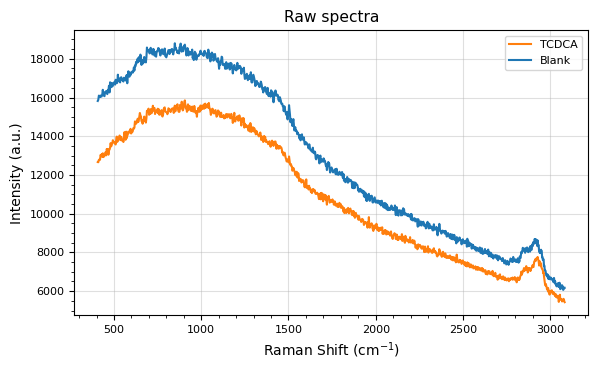

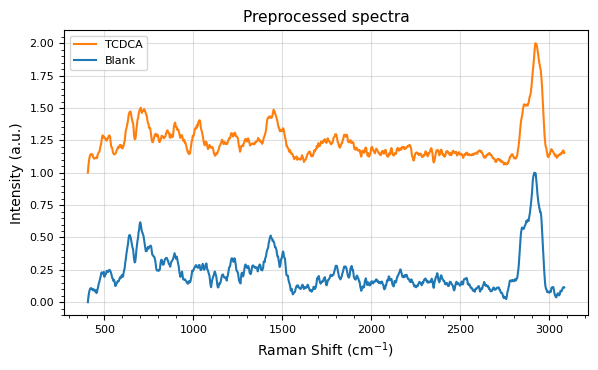

In [5]:
# 1) Subtracts the baseline signal from the spectra
sp_bc = als_baseline_cor(sp_sample, lam=1e4, p=0.001, niter=10, return_baseline=False)
# 2) Smoothes the spectra
sp_bc_svg = savgol_smoothing(sp_bc, window_length=15, p=3, degree=0)
# 3) Normalizes the spectra 
sp_bc_svg_norm = intensity_normalization(sp_bc_svg, norm='maxmin')

# Graphs visualization : 
legend=(label_a, label_b)
spectro_plot(wn, sp_sample, title='Raw spectra', legend=legend)
spectro_plot(wn, sp_bc_svg_norm[0], sp_bc_svg_norm[1], y_space=1, title='Preprocessed spectra', legend=legend)